In [ ]:
# Performed as a part of curriculum at Great Learning
import tensorflow
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D,Activation
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mping

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Loading the dataset
!wget https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
!wget https://www.dropbox.com/s/i37jfni3d29raoc/test_set.zip

--2021-10-09 05:29:15--  https://www.dropbox.com/s/t4pzwpvrzneb190/training_set.zip
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/t4pzwpvrzneb190/training_set.zip [following]
--2021-10-09 05:29:15--  https://www.dropbox.com/s/raw/t4pzwpvrzneb190/training_set.zip
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc4cbc7af611a5b74e1d35828b7d.dl.dropboxusercontent.com/cd/0/inline/BXuGoEIhvZ9MgEbBn14EjMfooRJO0lkZ1eaCf0W17yaSFwdFb4CIY_xeyZeaLBgLZAeeUEQexynJ520DjAe5G-tGxaj6N3ssvjF-NGgMTbDUuxq7vrYxr34Z2ZWCjwciGbPIrHeNyDGJpHca-yCtC6R0/file# [following]
--2021-10-09 05:29:15--  https://uc4cbc7af611a5b74e1d35828b7d.dl.dropboxusercontent.com/cd/0/inline/BXuGoEIhvZ9MgEbBn14EjMfooRJO0lkZ1eaCf0W17yaSFwdFb4CIY_xeyZeaLBgLZAeeUEQexynJ52

In [ ]:
!unzip '/content/training_set.zip'
!unzip '/content/test_set.zip'

Archive:  /content/test_set.zip
replace test_set/test_set/cats/_DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

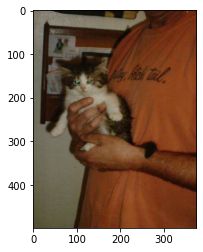

In [ ]:
img=mping.imread('/content/test_set/test_set/cats/cat.4002.jpg')
imgplot=plt.imshow(img)
plt.show()

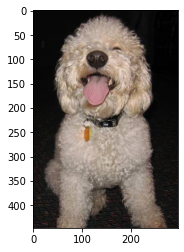

In [ ]:
img=mping.imread('/content/test_set/test_set/dogs/dog.4003.jpg')
imgplot=plt.imshow(img)
plt.show()

In [ ]:
img_width,img_height=150,150
train_data_dir=r"/content/training_set/training_set"
validation_data_dir=r"/content/test_set/test_set"
nb_train_sample=100
nb_validation_samples=100
epochs=20
batch_size=20

In [ ]:
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first':
  input_shape=(3,img_width,img_height)
else:
  input_shape=(img_width,img_height,3)

In [ ]:
train_datagen=ImageDataGenerator(rescale=1/255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator=train_datagen.flow_from_directory(train_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary',classes=['cats','dogs'])
test_datagen=ImageDataGenerator(rescale=1/255)
validation_generator=test_datagen.flow_from_directory(validation_data_dir,target_size=(img_width,img_height),batch_size=batch_size,class_mode='binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
# Creating and training the model
model=Sequential()
model.add(Conv2D(64,(3,3),input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
activation (Activation)      (None, 148, 148, 64)      0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 350464)            0         
_________________________________________________________________
dense (Dense)                (None, 64)                22429760  
_________________________________________________________________
activation_1 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [33]:
train_generator.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
training=model.fit_generator(train_generator,steps_per_epoch=nb_train_sample,epochs=epochs,validation_data=validation_generator,validation_steps=nb_validation_samples)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
100/100 [==============================] - 89s 872ms/step - loss: 2.2381 - accuracy: 0.5650 - val_loss: 0.7237 - val_accuracy: 0.5585
Epoch 2/20
100/100 [==============================] - 86s 859ms/step - loss: 0.6707 - accuracy: 0.6050 - val_loss: 0.6170 - val_accuracy: 0.6740
Epoch 3/20
100/100 [==============================] - 89s 886ms/step - loss: 0.6576 - accuracy: 0.6495 - val_loss: 0.5929 - val_accuracy: 0.7010
Epoch 4/20
100/100 [==============================] - 86s 859ms/step - loss: 0.6460 - accuracy: 0.6610 - val_loss: 0.7843 - val_accuracy: 0.6005
Epoch 5/20
100/100 [==============================] - 86s 856ms/step - loss: 0.6252 - accuracy: 0.6630 - val_loss: 0.5863 - val_accuracy: 0.7015
Epoch 6/20
100/100 [==============================] - 85s 853ms/step - loss: 0.6280 - accuracy: 0.6725 - val_loss: 0.5984 - val_accuracy: 0.7010
Epoch 7/20
100/100 [==============================] - 85s 858ms/step - loss: 0.6195 - accuracy: 0.6741 - val_loss: 0.6958 - val_ac

In [ ]:
h=training.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

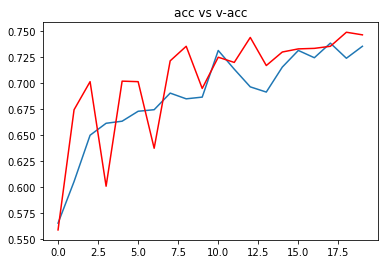

In [ ]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c="red")
plt.title("acc vs v-acc")
plt.show()

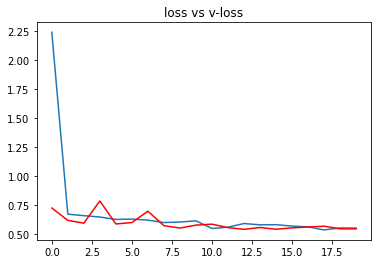

In [ ]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c="red")
plt.title("loss vs v-loss")
plt.show()

In [ ]:
t_img,label=train_generator.next()

In [ ]:
t_img.shape

(20, 150, 150, 3)

In [ ]:
def PlotImages(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

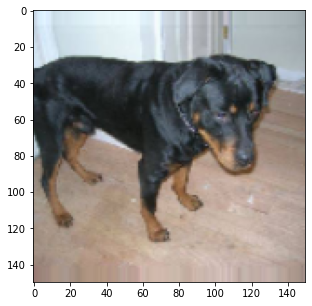

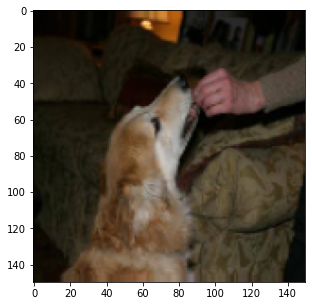

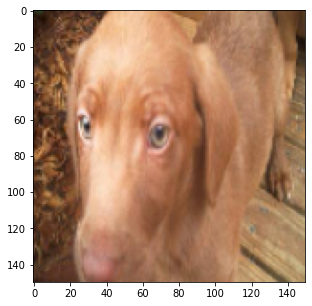

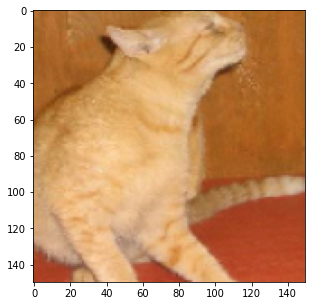

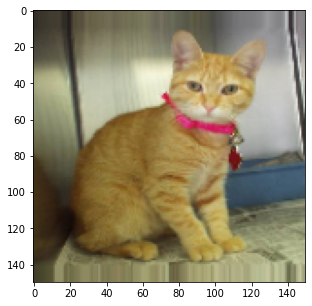

In [ ]:
PlotImages(t_img[:5],label[:5])

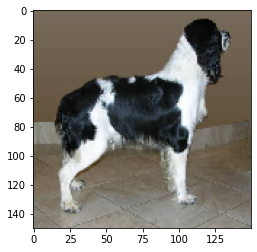

In [ ]:
# Applying the model on a test image
img=image.load_img('/content/test_set/test_set/dogs/dog.4005.jpg',target_size=(150,150))
plt.imshow(img)

In [ ]:
from tensorflow.keras.preprocessing import image
from google.colab.patches import cv2_imshow
import numpy as np
img=image.load_img('/content/test_set/test_set/dogs/dog.4005.jpg',target_size=(150,150))
img_pred=image.img_to_array(img)
img_pred=np.expand_dims(img_pred,axis=0)
result=model.predict(img_pred)
print(result)
prediction=""
if result[0][0]==1:
  prediction="Dog"
else:
  prediction="Cat"
print('Prediction:',prediction)

[[1.]]
Prediction: Dog
